#### Number of Supermarkets in each neighborhood



Another factor taken into consideration was the number of supermarkets in each neighborhood. The best neighborhood was determined by which neighborhood had the most supermarkets. This was considered a factor because when a family decides which neighborhood to live in, supermarkets to buy grocery's are very important because no one wants to travel long distances when going to buy food each weekend. In addition, with multiple supermarkets, it gives families a variety of choices to pick from. 
    
In order to narrow down the data, the neighborhoods with <1 supermarkets were removed. Also, when I was reading the csv file, I realized that many Pittsburgh neighborhoods were labeled as just "pittsburgh", so I made a new csv file replacing all of them with their respective neighborhood names. Another problem I ran into was that this data set also includes suburbs which are not listed as a "neighborhood" in pgh and they were really far from the city, so I just ended up removing them from the data set when I filtered the data to see how many supermarkets in each neighborhood.

In [12]:
import pandas as pd
%matplotlib inline
 ##import original data
super_csv = "https://data.wprdc.org/dataset/cd2b3e27-ca31-43e0-a8c6-2e6c43b4050a/resource/6f18890b-b8f7-4bc8-8086-f5401b6e086c/download/geocodedfoodfacilities-filtered-supermarkets-v2.csv"
super_data = pd.read_csv(super_csv)
super_data.head(5)

,name,street_address,city,state,zip_code,latitude,longitude,localizability,data_source_name,data_source_url,primary_key_from_rocket,asset_type
0,Kuhn's Market,661 Lincoln Ave,Pittsburgh,PA,15202,40.497162,-80.060279,fixed,WPRDC Dataset: Allegheny County Restaurant/Foo...,https://data.wprdc.org/dataset/allegheny-count...,36519,supermarkets
1,Food Shoppe,5878 Northumberland Street,Pittsburgh,PA,15217,40.441561,-79.920536,fixed,WPRDC Dataset: Allegheny County Restaurant/Foo...,https://data.wprdc.org/dataset/allegheny-count...,36498,supermarkets
2,Shop 'n Save / Shaler,1620 Babcock Boulevard,Pittsburgh,PA,15209,40.499147,-79.978901,fixed,WPRDC Dataset: Allegheny County Restaurant/Foo...,https://data.wprdc.org/dataset/allegheny-count...,32725,supermarkets
3,Giant Eagle #61,2021 Wharton Street,Pittsburgh,PA,15203,40.431132,-79.976607,fixed,WPRDC Dataset: Allegheny County Restaurant/Foo...,https://data.wprdc.org/dataset/allegheny-count...,38879,supermarkets
4,Safrans Market,429 Walnut Street,Sewickley,PA,15143,40.541039,-80.182262,fixed,WPRDC Dataset: Allegheny County Restaurant/Foo...,https://data.wprdc.org/dataset/allegheny-count...,30265,supermarkets


In [15]:
##filtering down the data table
selected_columns = ['name', 'street_address', 'city']
selected_data = super_data[selected_columns]

# Display the selected columns as a table
selected_data.head(10)

,name,street_address,city
0,Kuhn's Market,661 Lincoln Ave,Pittsburgh
1,Food Shoppe,5878 Northumberland Street,Pittsburgh
2,Shop 'n Save / Shaler,1620 Babcock Boulevard,Pittsburgh
3,Giant Eagle #61,2021 Wharton Street,Pittsburgh
4,Safrans Market,429 Walnut Street,Sewickley
5,T-Bones,100 VIP Drive,Wexford
6,Shop 'n Save #1076 Mt. Washington,125 Virginia Avenue,Pittsburgh
7,Shursave,4401 Liberty Avenue,Pittsburgh
8,Shop 'n Save,4647 Buttermilk Hollow Road,West Mifflin
9,Giant Eagle #74,1165 McKinney Lane #100,Pittsburgh


In [13]:
#take away neighborhoods/suburbs too far or not considered a neighborhood
supermarket_data = supermarket_data[~supermarket_data["city"].isin(["Wexford", "West Mifflin","Mc Keesport","Verona","plesant",'Gibsonia','Natrona Heights',
                    'Whitehall','Ross','Monroeville'])]

#group data to only show the city and number of grocery stores it has
result = supermarket_data.groupby("city")["name"].count()

# Sort the results in descending order
sorted_result = result.sort_values(ascending=False)

#get rid of data with <1 supermarket
filtered_result = sorted_result[sorted_result > 1]

ranked_cities = filtered_result.reset_index()
ranked_cities.head(24)


NameError: name 'supermarket_data' is not defined

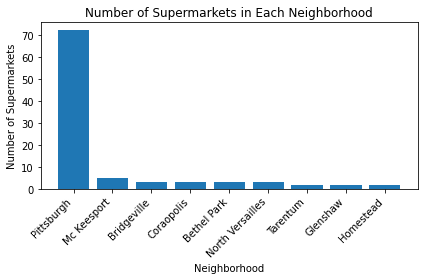

In [17]:
#plotting the data on a bar graph
import matplotlib.pyplot as plt
plt.bar(ranked_cities["city"], ranked_cities["name"])
plt.xlabel("Neighborhood")
plt.ylabel("Number of Supermarkets")
plt.title("Number of Supermarkets in Each Neighborhood")
plt.xticks(rotation=45, ha="right")  
plt.tight_layout()  

plt.show()